In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

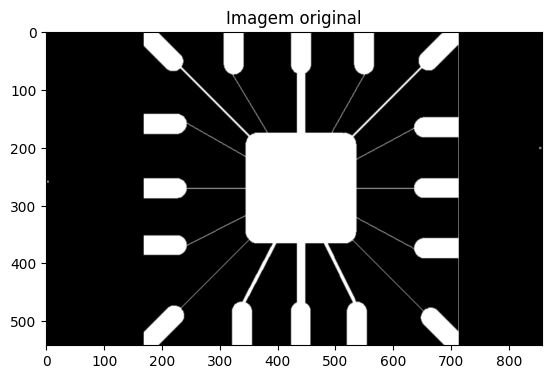

In [ ]:
image = cv2.imread("imagem_borda.png", 0)
plt.imshow(image, cmap="gray")
plt.title("Imagem original")
plt.show()

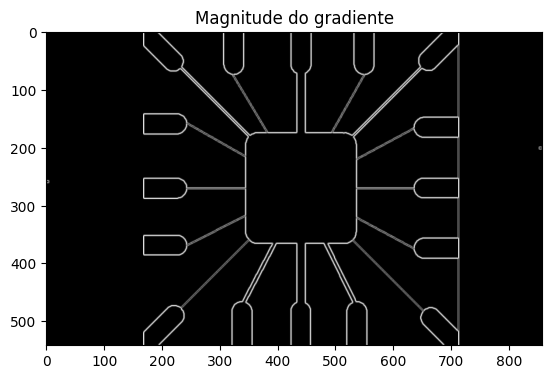

In [ ]:
# Filtros de Sobel 
gh = cv2.Sobel(image, cv2.CV_64F, 1, 0)  # Gradiente horizontal (gh)
gv = cv2.Sobel(image, cv2.CV_64F, 0, 1)  # Gradiente vertical (gv)

magnitude = np.sqrt(gh**2 + gv**2)

magnitude = cv2.normalize(magnitude, None, 0, 255, cv2.NORM_MINMAX, cv2.CV_8U)

plt.imshow(magnitude, cmap="gray")
plt.title("Magnitude do gradiente")
plt.show()

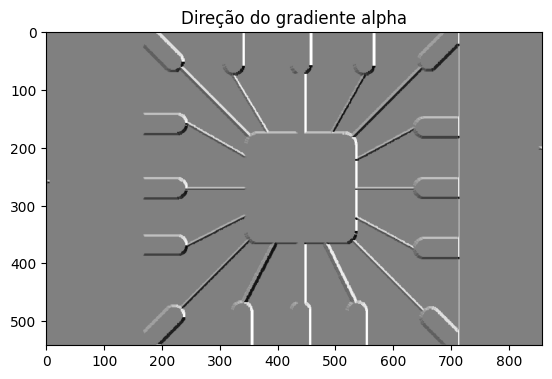

In [ ]:
# Direção do gradiente alpha
alpha = np.arctan2(gv, gh)  # Resultado em radianos
alpha_degrees = np.degrees(alpha)

alpha_normalized = cv2.normalize(alpha_degrees, None, 0, 180, cv2.NORM_MINMAX, cv2.CV_8U)
plt.imshow(alpha_normalized, cmap="gray")
plt.title("Direção do gradiente alpha")
plt.show()

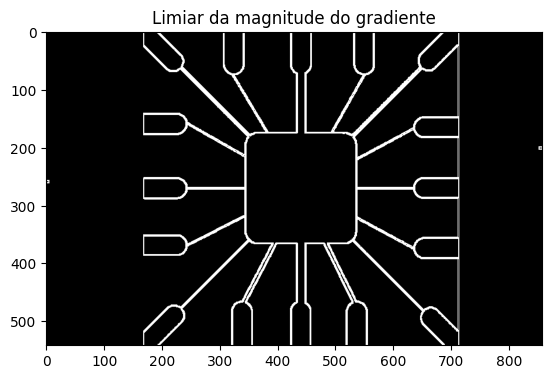

In [ ]:
# Limiarizar a magnitude do gradiente para encontrar as bordas da imagem
magnitude = np.sqrt(gh**2 + gv**2)

limiar = 50  # Valor do limiar global, ajuste conforme necessário
_, bordas = cv2.threshold(magnitude, limiar, 255, cv2.THRESH_BINARY)

plt.imshow(bordas, cmap="gray")
plt.title("Limiar da magnitude do gradiente")
plt.show()

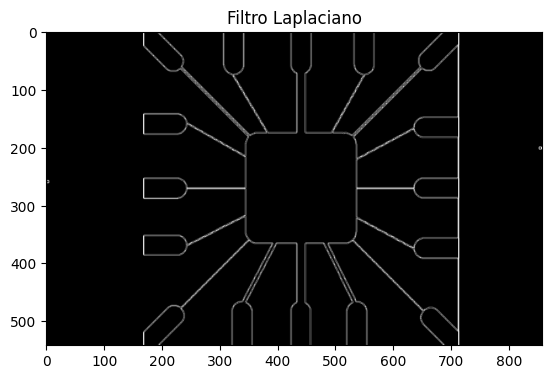

In [ ]:
# Aplicar o filtro Laplaciano
laplacian = cv2.Laplacian(image, cv2.CV_64F)

# Converter para imagem em escala de cinza
laplacian = cv2.convertScaleAbs(laplacian)

plt.imshow(laplacian, cmap="gray")
plt.title("Filtro Laplaciano")
plt.show()

Ao aplicar o filtro Laplaciano, são encontradas regiões onde os valores positivos indicam um aumento na intensidade da imagem, enquanto os valores negativos indicam uma diminuição na intensidade. Esses valores podem ser interpretados como uma medida da curvatura das transições de intensidade.